# INF221 Assignment 3
Jon Nordby

In [1]:
%matplotlib inline

import math
import random

import matplotlib
import pandas

## Exercise 10

CLRS 4.1-1: What does Find-Maximum-Subarray return when all elements of A are negative?


zero / empty-set ? 

## Exercise 11

CLRS 4.1-3 (partial):

Implement both the brute-force and the recursive algorithms for the maximum-subarray problem on your own computer using Python. What problem size $n_0$ gives the crossover point at which the recursive algorithm beats the brute force algorithm?

Hints:

Use Python module timeit to time execution of your code. 
To create input data, use cumulative sums of random numbers as in the example towards the end of Lecture 4.


In [66]:
def maximum_subarray_bruteforce(A):
    largest = (-1, -1, -math.inf) # start, end, sum
    for i in range(0, len(A)):
        for j in range(i, len(A)):
            subsum = sum(A[i:j+1])
            if subsum > largest[2]:
                largest = (i, j+1, subsum)
    return largest

def test_max_subarray(func):
    # Simple known case
    ex = [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
    expect = (7, 11)
    out = func(ex)
    assert out[0:2] == expect, "{} != {}".format(out[0:2], expect)
    
    # extreme case, all values are positive and contribute to a greater sum 
    all_positive = [ random.randint(0, 99) for _ in range(random.randint(2, 13)) ]
    out = func(all_positive)
    expect = (0, len(all_positive))
    assert out[0:2] == expect, "{} != {}".format(out[0:2], expect)

    # extreme case, all values are negative,
    all_negative = [ random.randint(-99, -1) for _ in range(random.randint(2, 5)) ]
    out = func(all_negative)
    maximum = sorted(all_negative, reverse=True)[0]
    #print(all_negative, maximum, out)
    assert out[1] - out[0] == 1
    assert all_negative[out[0]] == maximum

    # extreme case, single input
    single_value = [ random.randint(-99, 99) ]
    out = func(single_value)
    #print(single_value, out)
    assert out[0:2] == (0, 1)
    
    # TODO: error case, empty input array
    pass
    
    # TODO: check property: sum of returned subarray is >= the sum of input array?
    sub = ex[expect[0]:expect[1]]
    #print(sum(ex), sum(sub), sorted(ex, reverse=True))
    
    # TODO: check property: sum of returned subarray is >= maximum value of input?
    # TODO: check property, indices are always > 0
    # TODO: check proeprty, end indice is always > start indice
    
test_max_subarray(maximum_subarray_bruteforce)

In [104]:
def _maximum_subarray_crossing(A, low, mid, high):
    left_sum = -math.inf
    temp_sum = 0
    max_left = -1
    
    # TODO: could be rewritten as a summax function
    for i in range(mid, low-1, -1):
        temp_sum += A[i]
        if temp_sum > left_sum:
            left_sum = temp_sum
            max_left = i
    
    right_sum = -math.inf
    temp_sum = 0
    max_right = -1
    for i in range(mid+1, high+1):
        temp_sum += A[i]
        if temp_sum > right_sum:
            right_sum = temp_sum
            max_right = i

    assert max_left != -1
    assert max_right != -1
    return (max_left, max_right, left_sum + right_sum)
    
def _maximum_subarray_recursive(A, low, high):
    if high == low:
        # only one element
        return low, high, A[low]
    else:
        #print('sub')
        mid = math.floor((low + high) / 2)
        left = _maximum_subarray_recursive(A, low, mid)
        right = _maximum_subarray_recursive(A, mid+1, high)
        #print('precross', low, high)
        cross = _maximum_subarray_crossing(A, low, mid, high)
        if left[2] >= right[2] and left[2] >= cross[2]:
            return left
        elif right[2] >= left[2] and right[2] >= cross[2]:
            return right
        else:
            return cross
    
def maximum_subarray_recursive(A):
    start, end, _sum = _maximum_subarray_recursive(A, 0, len(A)-1)
    return start, end+1, _sum

test_max_subarray(maximum_subarray_recursive)

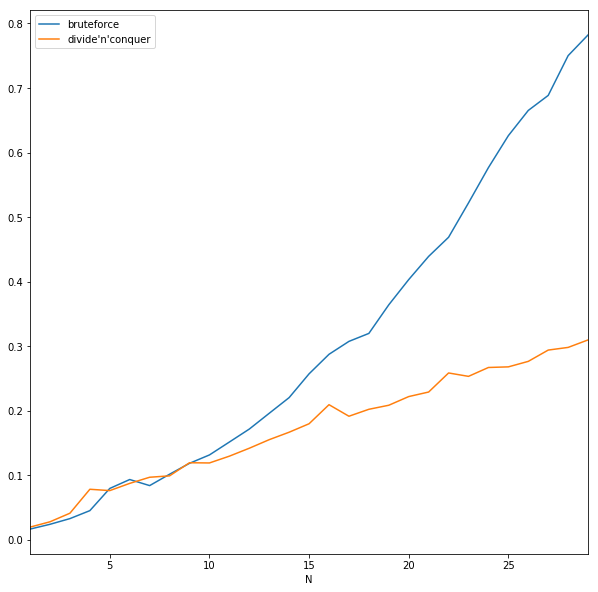

In [120]:
import timeit
def time_subarray(arr, repeats=1000):
    b = maximum_subarray_bruteforce
    r = maximum_subarray_recursive
    brute = timeit.timeit('b(arr)', number=repeats, globals=locals())
    recursive = timeit.timeit('r(arr)', number=repeats, globals=locals())
    return brute, recursive

def randomarray(length):
    return [random.randint(-300000, 300000) for _ in range(length+1)]
    
N = list(range(1, 30))
times = [time_subarray(randomarray(n)) for n in N] 
df = pandas.DataFrame({
    'bruteforce': [ t[0] for t in times ],
    "divide'n'conquer": [ t[1] for t in times ],
    'N': N,
})
df.plot(x='N', figsize=(10, 10))

With these implementations the brute force solution is (marginally) faster when n < 10 approximately. The exact point varies a bit based on the testrun.

## Exercise 12

CLRS 4.3-1 & 2:

a) Show that the solution of $T(n)=T(n-1)+n$ is $O(n^2)$.

b) Show that the solution of $T(n) = T(\lceil n/2 \rceil)+1$ is $O(\lg n)$.

 Recursion
 Substitution method?
 See Assignment 2, Ex 7

## Exercise 13
CLRS 4.3-3

We saw that the solution of $T(n)=2T(\lfloor n/2 \rfloor)+n$ is $O(n\lg n)$.
Show that the solution of this recurrence is also: $\Omega(n\lg n)$ and conclude that the solution is $\Theta(n\lg n)$.

Hint: Use the same approach as for the upper bound in Ch 4.3. You will then need to find at some point an expression that is smaller than $\lfloor n/2 \rfloor \lg(\lfloor n/2 \rfloor)$. Here, it can be useful to use different lower bounds for $\lfloor n/2 \rfloor$ outside and inside the logarithm.


## Exercise 14
CLRS 4.4-1, 5:

Use recursion trees to determine a good asymptotic upper bound on the recurrences given below and then use the substitution method to verify your answers.

Note: This exercise can give you up to two points extra credit. You receive one point each for solving a) and b), and a third point for a tight bound in b).

a) $T(n) = 3T(\lfloor n/2\rfloor)+n$

Hint: The recursion tree analysis analysis is similar to the first example in Ch 4.4. For the proof using the substitution method, also take a look at the "Subtleties" section of Ch 4.3.

b) $T(n) = T(n-1)+T(n/2) + n$

Hint: To obtain an upper bound, perform a "worst case" analysis along the left edge of the recursion tree and assume that all levels are full. Prove that bound using the substitution method. For extra credit, attempt at tighter bound!

Page 86-90

## Exercise 15
CLRS 4.5-1:

Use the master method to give tight asymptotic bounds for the following recurrences:

### a) $T(n) = 2T(n/4)+1$

The equation is on the form required by Master method: $T(n) = aT(n/b) + f(n)$ with $a=2, b=4, f(n)=1$

$\Theta(f(n)) = \Theta(1) = \Theta(n^0)$ follows Case 1 (asymptotic runtime dominated by tree traversal), $\Theta(n^{log_b{a-e}})$ with $e=1$: $\Theta(n^{\log_4{2-1}}) = \Theta(1)$.

Thus the solution is $T(n) = \Theta(n^{\log_b a}) = \Theta(n^{\log_4 2}) = \Theta(n^{0.5}) = \Theta(\sqrt{n})$

### b) $T(n) = 2T(n/4) + \sqrt{n}$

Again $a=2, b=4$ and $f(n) = \sqrt{n}$.

$\Theta(f(n)) = \Theta(\sqrt{n}) = \Theta(n^{0.5})$ follows Case 2 (asymptotic runtime a combination of tree traversal and leaf function execution), $\Theta(n^{log_b{a}})$: $\Theta(n^{\log_4{2}}) = \Theta(\sqrt{n})$.

The solution for $T(n) = \Theta(f(n^{\log_b a} \lg n) = \Theta(n^{\log_4 2} \lg n) = \Theta(\sqrt{n}\lg n)$ 

### c) $T(n) = 2T(n/4)+n$

$a=2, b=5, f(n)=n$

$\Theta(f(n)) = \Theta(n) = \Theta(n^{1})$ follows Case 3 (asymptotic runtime dominated by leaf function execution) with $e=2$, $\Theta(n^{log_b{a+e}})$: $\Theta(n^{\log_4{2+2}}) = \Theta(n)$.

Therefore $T(n) = \Theta(f(n)) = \Theta(n)$ 

### d) $T(n) = 2T(n/4)+n^2$

$a=2, b=4, f(n) = n^2$

$\Theta(f(n)) = \Theta(n^2)$ follows Case 3 of the method with $e=14$, $\Theta(n^{log_b{a+e}})$: $\Theta(n^{\log_4{2+14}}) = \Theta(n^2)$.

Therefore $T(n) = \Theta(f(n)) = \Theta(n^2)$